## ROI selection reconstruction into a mask

From the nicely formatted \_ROI.csv and \_emb.csv files, we want to create an image mask of the same number of pixels as the source image, which will be our mask.
The files are stored zipped, with names:

Session1_flushed_1-fs-07_emb

Session1_flushed_1-fs-07_ROI

etc. We'll open each one and create a mask for embolism and a mask for ROI, with 1 where the area is ROI or embolism, and 0 is nothing.

In [3]:
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import zipfile

In [5]:
analysis_overview_df = pd.read_csv("./th_sampledata/analysis_overview_df_with_pathnames.csv")

In [6]:
analysis_overview_df

,plant_name,scan_nb,image_nb,voxel_size,session,pathname
0,1-fs-08,living,750,0.007005,Session1,/Volumes/PERL/invites/Session1/Living_plants/A...
1,1-fs-09,living,749,0.007005,Session1,/Volumes/PERL/invites/Session1/Living_plants/A...
2,1-fs-10,living,765,0.007005,Session1,/Volumes/PERL/invites/Session1/Living_plants/A...
3,1-fs-11,living,764,0.007005,Session1,/Volumes/PERL/invites/Session1/Living_plants/A...
4,1-fs-12,living,740,0.007005,Session1,/Volumes/PERL/invites/Session1/Living_plants/A...
...,...,...,...,...,...,...
352,6-qi-17,flushed,799,0.004705,Session2,/Volumes/PERL/invites/Session2/Flushed_samples...
353,6-qi-18,flushed,799,0.003388,Session2,/Volumes/PERL/invites/Session2/Flushed_samples...
354,6-qp-13,flushed,798,0.005165,Session2,/Volumes/PERL/invites/Session2/Flushed_samples...
355,6-qp-16,flushed,798,0.004252,Session2,/Volumes/PERL/invites/Session2/Flushed_samples...


First we'll work on ROI

In each \_ROI file, there is a barycenter x, y, and area for both the disk approximation of the ROI minus embolism surface and embolism surface. We know therefore that :

$$area_{ROI} = area_{ROI-emb} + area_{emb}$$

$$ x_{ROI} = x_{ROI-emb}\times \frac{area_{ROI-emb}}{area_{ROI-emb}} + x_{emb}\times \frac{area_{emb}}{area_{ROI-emb}}$$

$$ y_{ROI} = y_{ROI-emb}\times \frac{area_{ROI-emb}}{area_{ROI-emb}} + y_{emb}\times \frac{area_{emb}}{area_{ROI-emb}}$$

NB that writing $x_{emb} = x_{roi-emb} + \Delta x$ we have :

$$ x_{ROI} = x_{ROI-emb} + \Delta x \times \frac{area_{emb}}{area_{ROI-emb}}$$

$$ y_{ROI} = y_{ROI-emb}+ \Delta y \times \frac{area_{emb}}{area_{ROI-emb}}$$

True

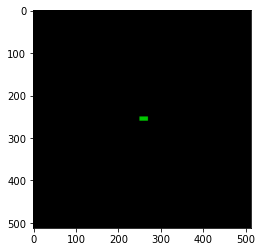

In [23]:
# We'll be working with images, so use the opencv library, with numpy to set individual values
# this works like the following
blank_image = np.zeros(shape=[512, 512, 3], dtype=np.uint8)
blank_image[250:260, 250:270, 1] = 200
# print(blank_image.shape)
plt.imshow(blank_image)
cv.imwrite('test_img.png',blank_image)

In [13]:
with zipfile.ZipFile('./th_csv_labels/csv_files_emb_roi.zip') as csv_labels_folder:
    for index, row in analysis_overview_df.iterrows():
        ROI_csv_filename = f"csv_files_emb_roi/{row.session}_{row.scan_nb}_{row.plant_name}_ROI.csv"
        # print(ROI_csv_filename)
        with csv_labels_folder.open(ROI_csv_filename) as ROI_file:
            ROI_df = pd.read_csv(ROI_file)
            print(ROI_df)

                                                       slice00750.Label-Analysis
Area     BaryCenterX BaryCenterY Mean EqDiameter index                 Materials
7.34437  1.98915     2.41924     1    3.05796    1                           ROI
0.115622 2.01312     2.26486     2    0.383685   2                      Embolism
                                                       slice00749.Label-Analysis
Area     BaryCenterX BaryCenterY Mean EqDiameter index                 Materials
11.8377  2.86119     2.61103     1    3.8823     1                           ROI
0.247043 2.71385     2.70678     2    0.560843   2                      Embolism
                                                       slice00765.Label-Analysis
Area     BaryCenterX BaryCenterY Mean EqDiameter index                 Materials
10.2927  2.43087     2.3742      1    3.62009    1                           ROI
0.128476 2.42791     2.42173     2    0.404452   2                      Embolism
                            

In [ ]:
Session1_living_1-fs-08_ROI

In [ ]:
roi_csv_df = pd.read_csv(f"{}")
roi_mask_i = np.zeros((2, 3)) - 1